In [26]:
library(tidyverse)
library(ggraph)
library(treemap)
library(tidygraph)
source("G:/software/ccgraph-master/R/gather_graph_edge.R")
source("G:/software/ccgraph-master/R/gather_graph_node.R")
data("GNI2014")
#head(GNI2014)
country_index <- c("continent","country")
nodes_country <- gather_graph_node(GNI2014,index = country_index, value = "population",root="world")
edges_country <- gather_graph_edge(GNI2014,index = country_index,root="world")
head(nodes_country)
#head(edges_country)
#graph_country <- tbl_graph(nodes_country,edges_country)

`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


,node.name,node.size,node.level,node.count,node.short_name,node.branch
,<chr>,<dbl>,<fct>,<dbl>,<chr>,<chr>
1,world,6683146875,world,1,world,world
2,Africa,962382035,continent,48,Africa,Africa
3,Asia,4033277009,continent,47,Asia,Asia
4,Europe,728669949,continent,41,Europe,Europe
5,North America,528748158,continent,24,North America,North America
6,Oceania,33949312,continent,13,Oceania,Oceania


In [48]:
setwd("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/WGCNA/module/Go_term")
nodes_country <- read.csv("Goterm_node3.csv", header=T)
edges_country <- read.csv('Goterm_net3.csv', header=T)
graph_country <- tbl_graph(nodes_country,edges_country)

Saving 6.67 x 6.67 in image



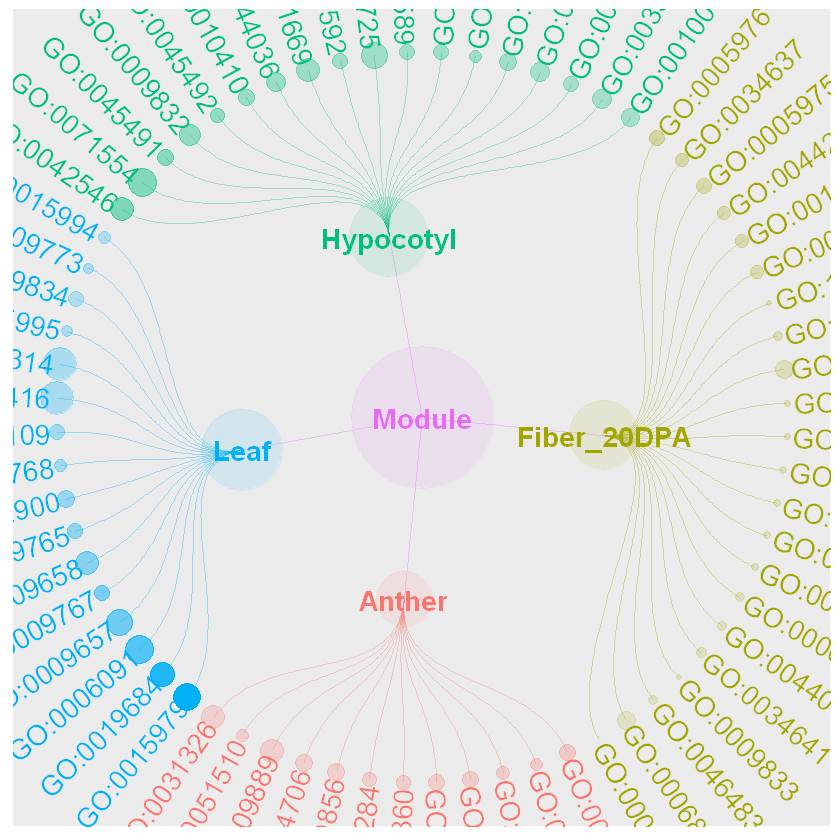

: 

In [67]:
gc <- ggraph(graph_country,layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal(aes(color=node1.node.branch),alpha=1/3) + 
  geom_node_point(aes(size=node.size,color=node.branch, alpha = -log10(node.FDR))) + 
  coord_fixed() +
  theme(legend.position = "none") + 
  scale_size(range = c(0.5,40)) +
      geom_node_text(
      aes(
        x = 1.0175 * x,
        y = 1.0175 * y,
        label = node.short_name,
        angle = -((-node_angle(x, y) + 90) %% 180) + 90,
        filter = leaf,
        color = node.branch
      ),
      size = 6, hjust = 'outward'
    )+
  geom_node_text(
    aes(label=node.short_name,
        filter = !leaf,
        color = node.branch),
    fontface="bold",
    size=6,
    family="sans"
  )
   #coord_cartesian(xlim=c(-4,4),ylim = c(-4,4))
gc 
ggsave("Goterm_node3_2.pdf")